# **Advertising Sales Prediction Model:** Supervised Regression Exercise

Machine Learning models are primarily categorised into Supervised and Unsupervised Learning models. To better understand them, I wanted to work on a **Supervised model for the Sales Prediction** of a company.

**Supervised Learning Algorithms** work on model that are trained on labeled data, while in **Unsupervised Learning Algorithms**, the model is expected to identify the patterns; it doesn't have the labels present.

Supervised Learning Algorithms are of two types: Regression and Classification

- **Regression:** When the labeled data is numerical
- **Classification:** When the labeled data is categorical

---

## About the Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

It is required to understand the impact of ad budgets on the overall sales.

---

## Exercise Objective
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple features.
- Regression Models to be used: k-Nearest, Linear Regression, SVM, Decision Tree, Random Forest, Gradient Boosting
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

---

## 0. Import/Install Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Regression Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor)
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# Metrics


## 1. Prepare Dataset

### 1.1 Loading Data

In [2]:
DATA_DIR = "/Users/shawerma-mac/Library/CloudStorage/OneDrive-ASIANINSTITUTEOFMANAGEMENT/MSDS/Personal_Projects/Machine_Learning/Dataset/advertising_sales_dataset/"
df = pd.read_csv(DATA_DIR + "Advertising_Budget_and_Sales.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.tail()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


### 1.2 Check Datatypes

In [6]:
df.dtypes

TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

We can see there is no categorical data in this dataset.

### 1.3 Checking Duplicates and Nulls

We will check whether there are any duplicate rows in the dataset.

In [7]:
print("Total Number of Duplicate Values:", df.duplicated().sum())
print("Count of each type of values:", df.duplicated().value_counts())

Total Number of Duplicate Values: 0
Count of each type of values: False    200
Name: count, dtype: int64


Indicates that there are no duplicate rows in the dataset.

In [8]:
print("Total Number of Null Values:", df.isnull().sum())
print("Total Number of NA Values:", df.isna().sum())
print("Count of each type of Values", df.isnull().value_counts())

Total Number of Null Values: TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64
Total Number of NA Values: TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64
Count of each type of Values TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  Sales ($)
False             False                False                    False        200
Name: count, dtype: int64


### 1.4 Splitting to training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(columns=['Sales ($)']) #features
y = df[['Sales ($)']] #target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [12]:
print("Train Features Dimensions:", X_train.shape)
print("Train Target Dimensions:", y_train.shape)

print("Test Features Dimensions:", X_test.shape)
print("Test Target Dimensions:", y_test.shape)

Train Features Dimensions: (160, 3)
Train Target Dimensions: (160, 1)
Test Features Dimensions: (40, 3)
Test Target Dimensions: (40, 1)


## 2. Understanding Correlation of Features

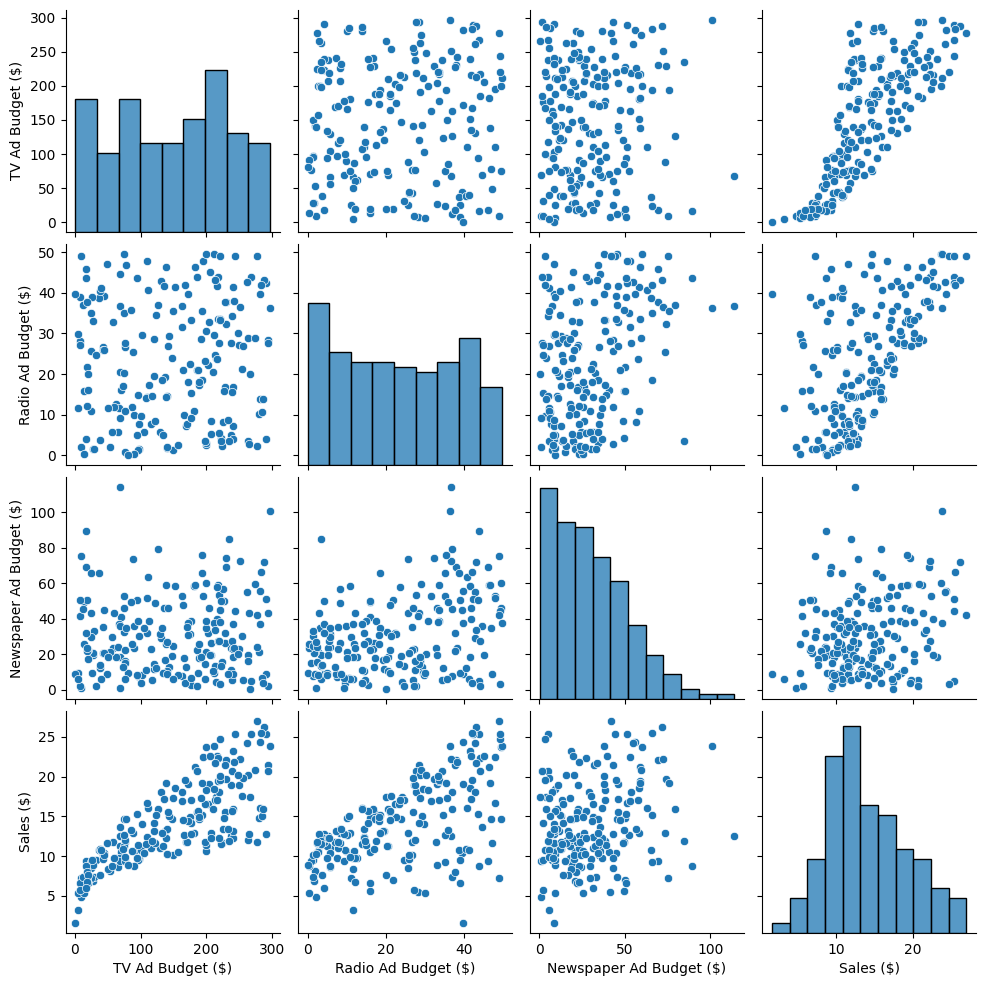

In [22]:
sns.pairplot(df)

From the visualisation above, it seems that Radio Ad Budget and TV Ad Budget has the most influence on the Sales. Let us also look at the heatmap chart to understand the correlation.

<Axes: >

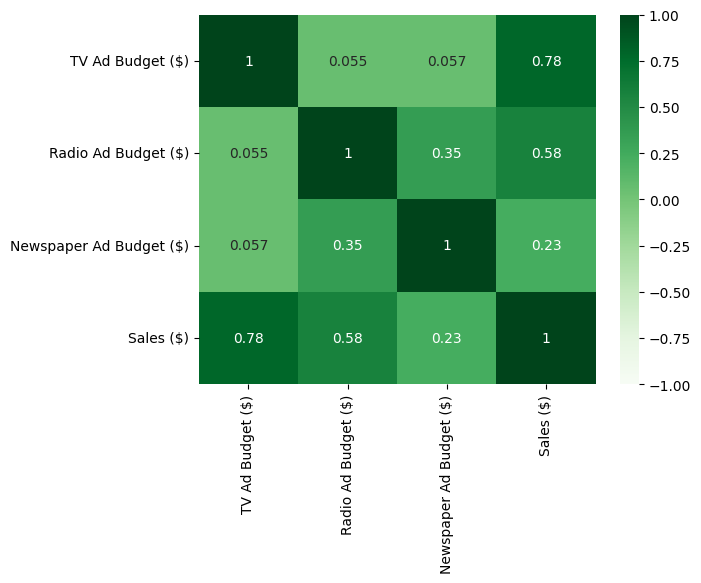

In [24]:
sns.heatmap (df.corr(), vmin=-1, vmax=1, cmap="Greens", annot=True)

We can see that the highest correlation of Sales is with the TV Ad Budget, and then the Radio Ad Budget. Since this is a regression problem, we will now see how the regression line is plotted in each correlation scatter plot with respect to the sales.

Text(0.5, 1.0, 'Regression Line of ad Newspaper vs Sales')

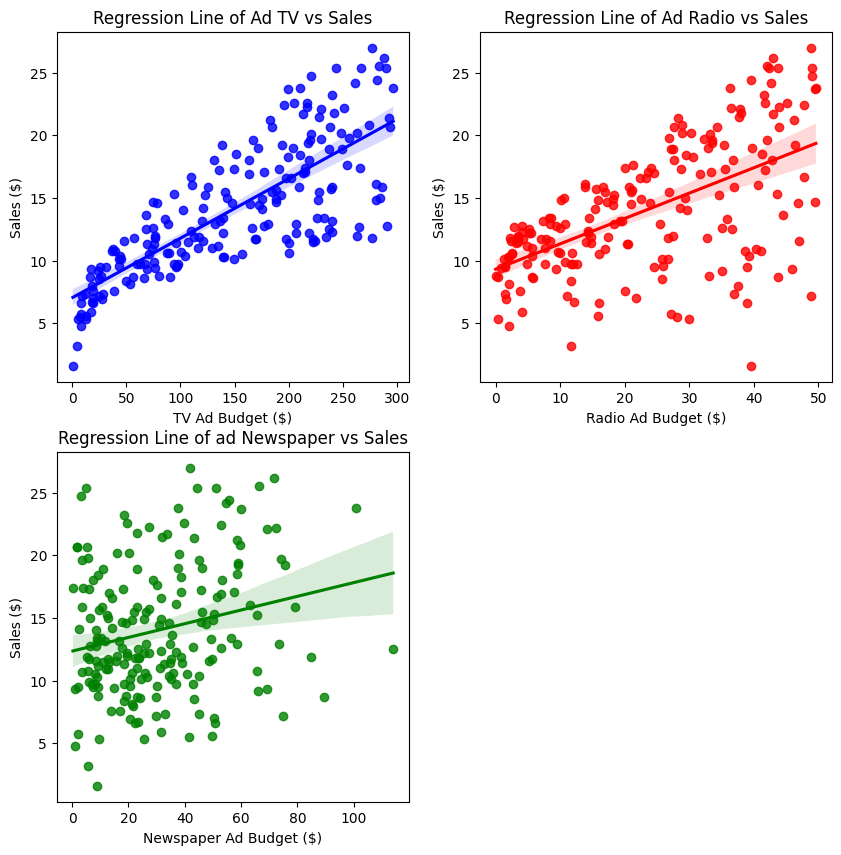

In [26]:
from matplotlib import figure

plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV Ad Budget ($)',y='Sales ($)',color='b').set_title('Regression Line of Ad TV vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio Ad Budget ($)',y='Sales ($)',color='r').set_title('Regression Line of Ad Radio vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper Ad Budget ($)',y='Sales ($)',color='g').set_title('Regression Line of ad Newspaper vs Sales')

## 3. Scaling Dataset

Now that the training and test sets have been split, the features of both needs to be scaled. We do not scale the targets.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Fit Model

In [15]:
knn = KNeighborsRegressor()
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
lSVR = LinearSVR()

### 4.1 Training Fit

In [16]:
knn.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)
dtr.fit(X_train_scaled, y_train)
rfr.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)
lSVR.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR()

In [17]:
y_preds_knn = knn.predict(X_test_scaled)
y_preds_lr = lr.predict(X_test_scaled)
y_preds_dtr = dtr.predict(X_test_scaled)
y_preds_rfr = rfr.predict(X_test_scaled)
y_preds_gbr = gbr.predict(X_test_scaled)
y_preds_lSVR = lSVR.predict(X_test_scaled)

In [18]:
from sklearn.metrics import mean_absolute_percentage_error

cols = ['Machine Learning Regression Method','Error %']
train_accuracy = pd.DataFrame(columns=cols)

train_accuracy.loc[0] = ['knn Regressor', mean_absolute_percentage_error(y_test, y_preds_knn)*100]
train_accuracy.loc[1] = ['Linear Regression', mean_absolute_percentage_error(y_test, y_preds_lr)*100]
train_accuracy.loc[2] = ['Decision Tree Regressor', mean_absolute_percentage_error(y_test, y_preds_dtr)*100]
train_accuracy.loc[3] = ['Random Forest Regressor', mean_absolute_percentage_error(y_test, y_preds_rfr)*100]
train_accuracy.loc[4] = ['Gradient Boosting Regressor', mean_absolute_percentage_error(y_test, y_preds_gbr)*100]
train_accuracy.loc[5] = ['Linear SVR', mean_absolute_percentage_error(y_test, y_preds_lSVR)*100]

train_accuracy

,Machine Learning Regression Method,Error %
0,knn Regressor,5.419296
1,Linear Regression,7.650448
2,Decision Tree Regressor,4.358041
3,Random Forest Regressor,3.791009
4,Gradient Boosting Regressor,3.969562
5,Linear SVR,7.524954


Random Forest Regressor seems to be the best model for this. Now, let us check the comparison between the Actual and Predicted in the Random Forest Regression model.

In [29]:
pred_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds_rfr})
pred_comparison.head(10)

ValueError: Data must be 1-dimensional, got ndarray of shape (40, 1) instead

Text(0.5, 1.0, 'Sales Prediction - Training Set (Random Forest)')

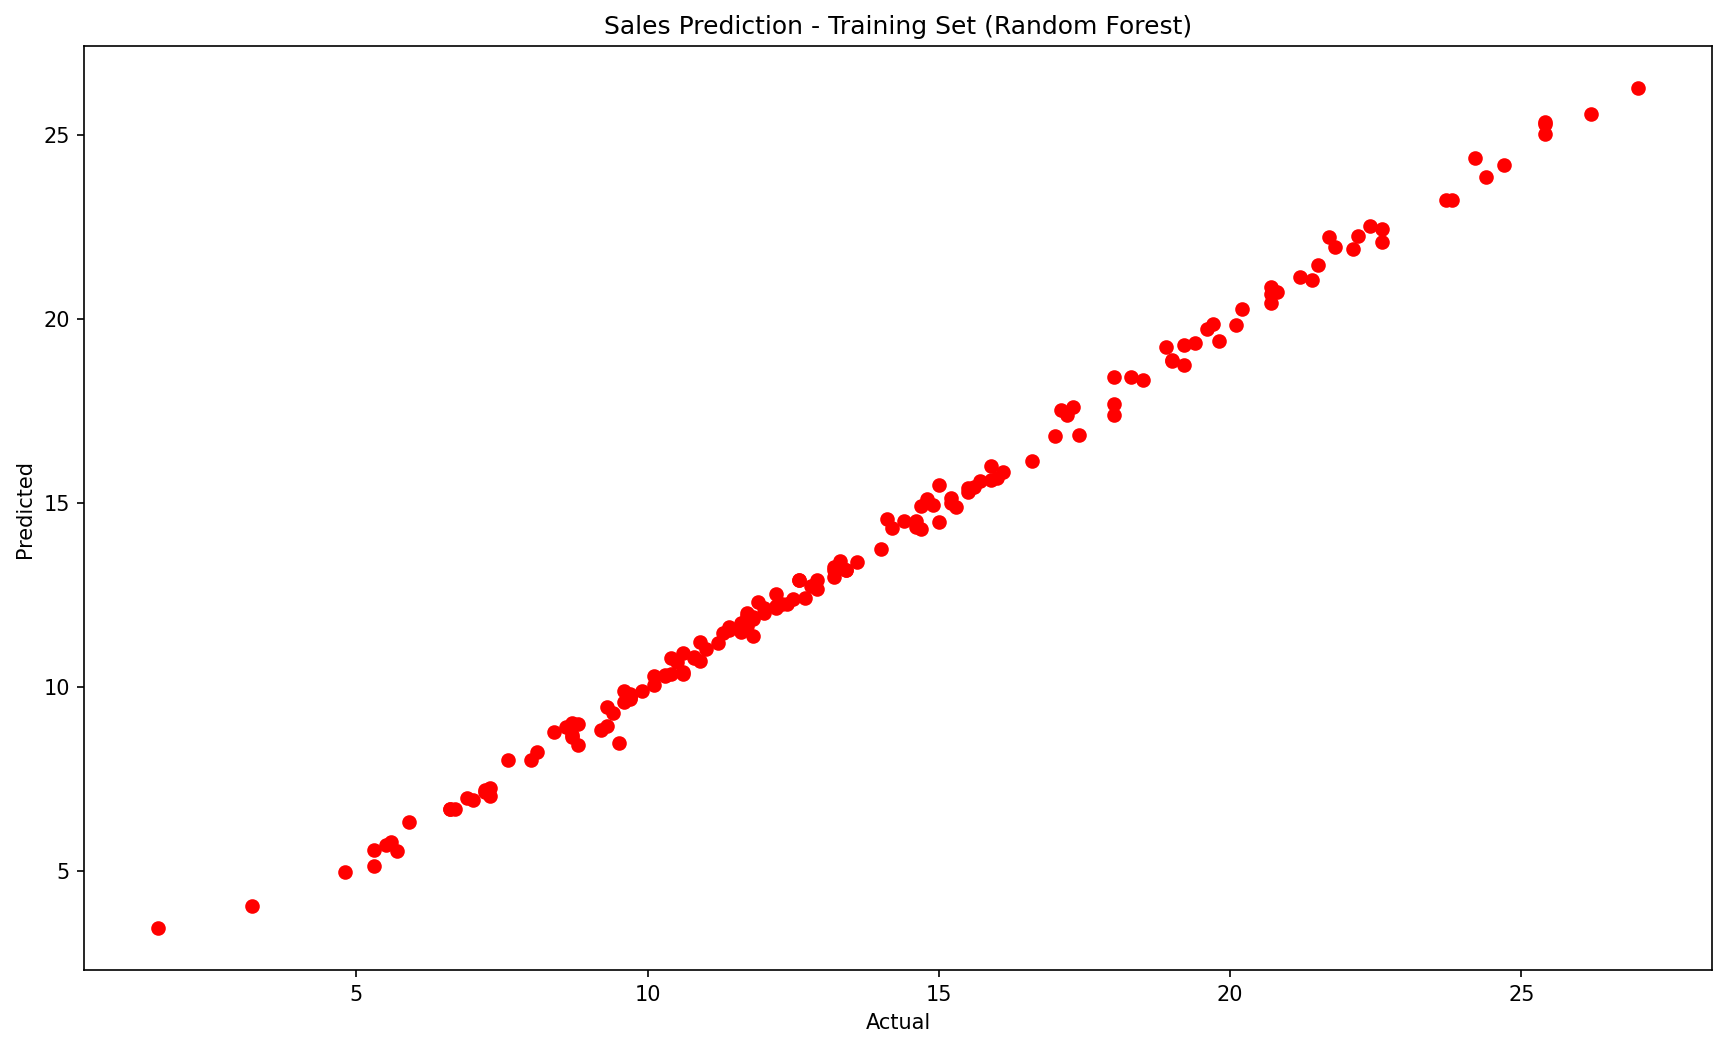

In [19]:
fig = plt.figure(figsize=(14, 8), dpi=150, edgecolor = 'black')
y_train_RFR = rfr.predict(X_train_scaled)
plt.scatter(y_train, y_train_RFR, c="r", label="Training Set Accuracy")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sales Prediction - Training Set (Random Forest)")

### 4.2 Test Fit

R2 score = 0.979272


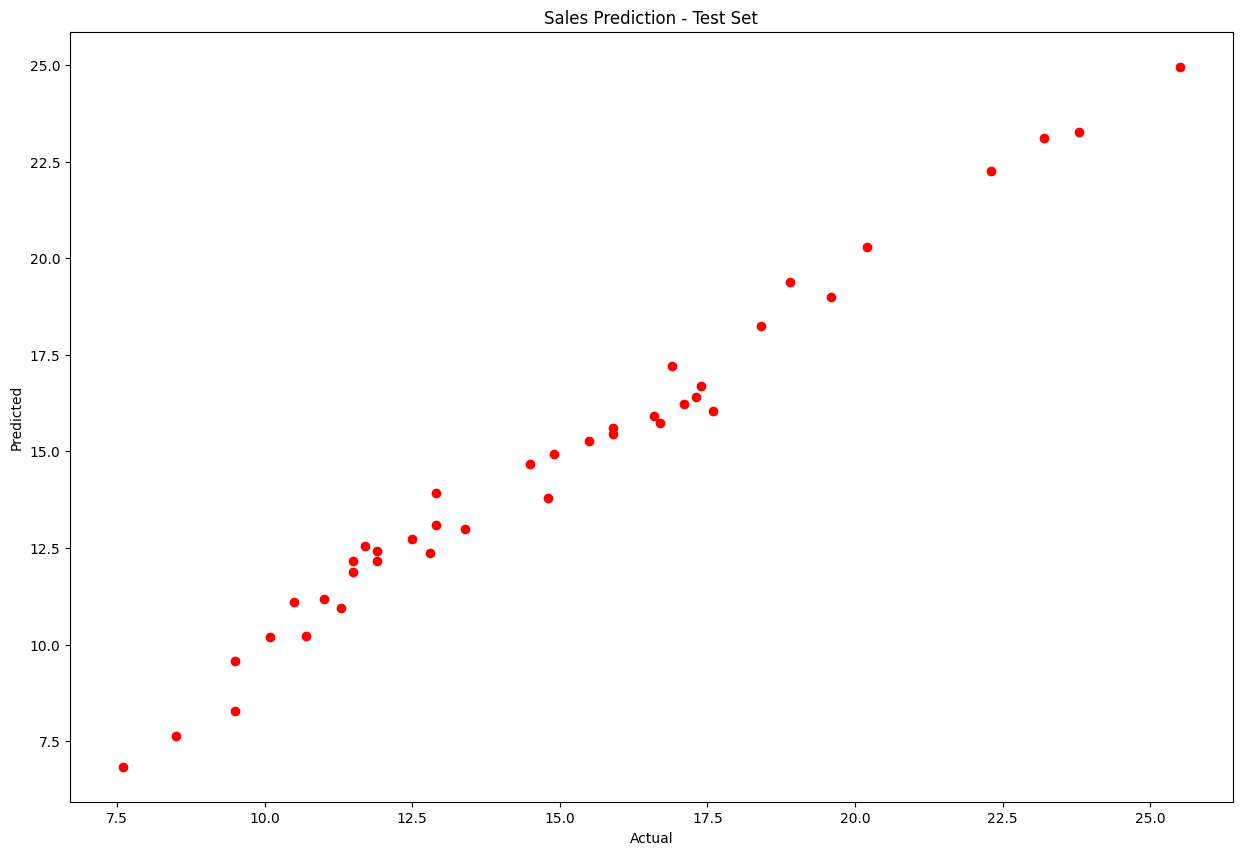

In [20]:
import numpy as np
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(15, 10))
y_test_RFR = rfr.predict(X_test_scaled)
plt.scatter(y_test,y_test_RFR, c="r", label="test (actual) data")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sales Prediction - Test Set")
print("R2 score = %f"%r2_score(y_test, y_test_RFR))

In [33]:
cols2 = ['Regression Method','Train Accuracy Score', 'Test Accuracy Score']
model_r2_scores = pd.DataFrame(columns=cols2)

model_r2_scores.loc[0] = ['Linear Regression', f'{round(lr.score(X_train_scaled, y_train), 4)*100}%', f'{round(lr.score(X_test_scaled, y_test), 4)*100}%']
model_r2_scores.loc[1] = ['kNN', f'{round(knn.score(X_train_scaled, y_train), 4)*100}%', f'{round(knn.score(X_test_scaled, y_test), 4)*100}%']
model_r2_scores.loc[2] = ['Decision Tree Regressor', f'{round(dtr.score(X_train_scaled, y_train), 4)*100}%', f'{round(dtr.score(X_test_scaled, y_test), 4)*100}%']
model_r2_scores.loc[3] = ['Random Forest Regressor', f'{round(rfr.score(X_train_scaled, y_train), 4)*100}%', f'{round(rfr.score(X_test_scaled, y_test), 4)*100}%']
model_r2_scores.loc[4] = ['Gradient Boosting Regressor', f'{round(gbr.score(X_train_scaled, y_train), 4)*100}%', f'{round(gbr.score(X_test_scaled, y_test), 4)*100}%']
model_r2_scores.loc[5] = ['Linear SVR', f'{round(lSVR.score(X_train_scaled, y_train), 4)*100}%', f'{round(lSVR.score(X_test_scaled, y_test), 4)*100}%']

model_r2_scores

,Regression Method,Train Accuracy Score,Test Accuracy Score
0,Linear Regression,89.59%,89.28%
1,kNN,95.98%,95.19%
2,Decision Tree Regressor,100.0%,96.61%
3,Random Forest Regressor,99.66000000000001%,97.92999999999999%
4,Gradient Boosting Regressor,99.88%,97.5%
5,Linear SVR,89.01%,90.25%
